In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get current working directory
current_dir = os.getcwd()

print("Current directory:", current_dir)

Output_folder='Paths_Seg_Likelihood'


Current directory: C:\Users\mohabu\Desktop\Path_Clustering


In [3]:
## Create the output folder
folder_path = r''+Output_folder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [4]:
### import data

df = pd.read_pickle('Data/Cinderella_II_data.pkl')

df.shape

(243688, 70)

In [5]:
df

,engine_rpm,engine_fuel_rate,latitude,longitude,latitude_can0,longitude_can0,heading_magnetic,heading_true,course_over_ground_true,speed_over_ground,...,wavedirect,Temp_2m,Temp_surf,WaveSwell_ht,Swell_ht,Snow_depth,Snow_fall,Press_surf,Precip,Bathymetry
date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 08:54:52,1326.416667,82.000000,59.401617,18.355397,59.401590,18.355414,167.395300,172.890000,171.795700,0.448467,...,151.301651,293.959625,293.131531,1.387444,0.619551,0.0,-5.820766e-11,101286.906250,0.002678,30.0
2022-07-01 08:54:53,1340.500000,101.333333,59.401609,18.355403,59.401579,18.355416,167.395300,172.890000,171.795700,0.589003,...,151.303497,293.959625,293.131531,1.387459,0.619582,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:54,1379.500000,114.500000,59.401597,18.355410,59.401562,18.355425,167.395300,172.890000,171.795700,0.742814,...,151.305344,293.959625,293.131531,1.387473,0.619613,0.0,-5.820766e-11,101286.914062,0.002678,30.0
2022-07-01 08:54:55,1423.166667,120.000000,59.401582,18.355416,59.401548,18.355434,167.395300,172.890000,171.795700,0.900456,...,151.307190,293.959625,293.131531,1.387488,0.619644,0.0,-5.820766e-11,101286.921875,0.002677,30.0
2022-07-01 08:54:56,1423.083333,122.000000,59.401569,18.355422,59.401535,18.355439,167.395300,172.890000,171.795700,1.056645,...,151.309036,293.959625,293.131531,1.387503,0.619675,0.0,-5.820766e-11,101286.921875,0.002677,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06 15:22:27,1079.875000,28.375000,59.401974,18.355802,59.401973,18.355803,252.354950,257.849650,127.806862,0.087500,...,206.433884,282.306488,282.461243,2.048510,0.515422,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:28,1081.500000,35.666667,59.401974,18.355803,59.401972,18.355803,253.009533,258.504233,173.826817,0.208333,...,206.434097,282.306549,282.461243,2.048510,0.515455,0.0,-5.820766e-11,100333.257812,0.000399,30.0
2022-11-06 15:22:29,1081.416667,39.333333,59.401973,18.355803,59.401971,18.355803,253.374350,258.869033,169.127583,0.208333,...,206.434296,282.306580,282.461243,2.048509,0.515487,0.0,-5.820766e-11,100333.257812,0.000399,30.0


### Data Preprocessing

#### Modify Course and wind direction measurments

In [6]:
df['courseOverGroundTrue']= df.course_over_ground_true
df['windDirectionTrue']= df.wind_direction_true

df[['courseOverGroundTrue','windDirectionTrue']].describe()

,courseOverGroundTrue,windDirectionTrue
count,243688.000000,243688.000000
mean,178.397720,176.315674
std,91.753745,96.435665
min,0.048700,0.000000
25%,99.722948,101.645594
50%,171.795700,174.893483
75%,270.592938,261.916912
max,359.892000,359.892000


In [7]:
dforig=df

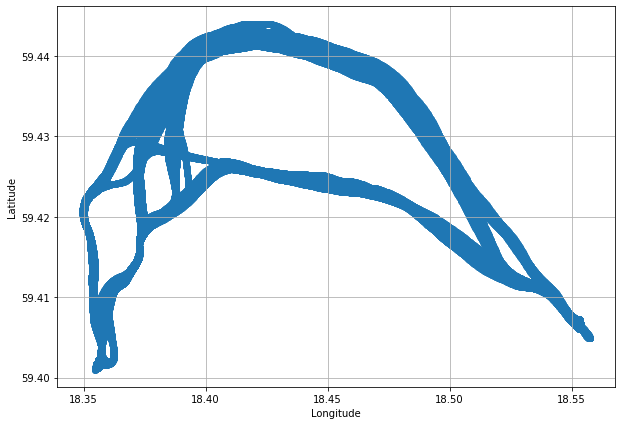

In [8]:
# Create a scatter plot of latitude and longitude to visualize the ferry's path
fig = plt.figure(figsize=(10,7))
plt.scatter(dforig['longitude'], dforig['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig(Output_folder+'/Scatter_dforig_lat_lon_paths.png', dpi=300)  

plt.show()

In [9]:
# st=stop

In [10]:
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South                 104308
North_Middle_Upper     66628
North_West_Upper       26867
North_East_Lower       26311
North_Middle_Lower     11407
South_West              4408
North_West_Lower        3759
Name: direction, dtype: int64

### Merging and changing names of some paths (minority paths with slight difference)

In [11]:
df['direction'] = df['direction'].replace('North_West_Upper', 'North_West')
df['direction'] = df['direction'].replace('North_West_Lower', 'North_West')

df['direction'] = df['direction'].replace('North_East_Lower', 'North_East')
df['direction'] = df['direction'].replace('North_Middle_Upper', 'North_Middle')
df['direction'] = df['direction'].replace('North_Middle_Lower', 'North_Middle')

# Check the new unique values
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64

In [12]:
dforig1=df
dforig2=df
dforig3=df

In [13]:
# df = df[['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue',
#               'distanceFromDock', 'distanceToNextDock', 'distanceToPreviousDock', 
#               'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg', 'EngineFuelRate',
#               'windSpeedOverGround', 'windDirectionTrue',  'windSpeed','windDirection', 
#               'waveheight', 'wavedirect','currentSpeed', 'currentDirection',
#               'windSpeed_sg', 'windDirection_sg', 'Temp_2m', 'Temp_surf',
#        'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
#          'iceCover', 'swellHeight', 'secondarySwellHeight','waterTemperature',
#          'direction']]


df['pathSelection']=df.direction

In [14]:
df.shape

(243688, 73)

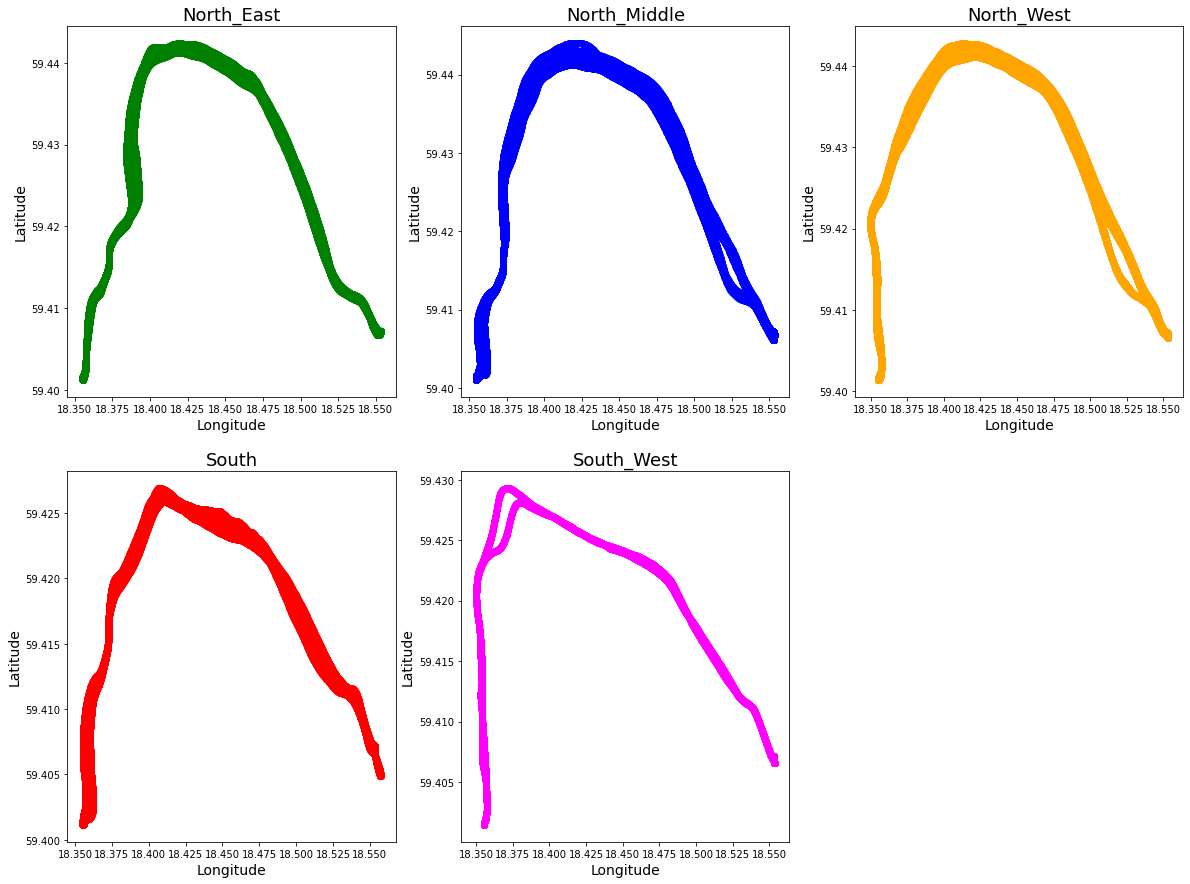

In [15]:
import matplotlib.pyplot as plt

# Filter data for each direction
north_east_data = df[df['direction'] == 'North_East']
north_middle_data = df[df['direction'] == 'North_Middle']
north_west_data = df[df['direction'] == 'North_West']
south_data = df[df['direction'] == 'South']
south_west_data = df[df['direction'] == 'South_West']

# Create subplots
fig_scatter_actual_paths, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Scatter plots for each direction
axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], color='green')
axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], color='blue')
axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], color='orange')
axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], color='red')
axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], color='magenta')


# Titles for each subplot
axes[0, 0].set_title('North_East',fontsize=18)
axes[0, 1].set_title('North_Middle',fontsize=18)
axes[0, 2].set_title('North_West',fontsize=18)
axes[1, 0].set_title('South',fontsize=18)
axes[1, 1].set_title('South_West',fontsize=18)

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
# Hide the empty subplot
axes[1, 2].axis('off')


# Save the figure
fig_scatter_actual_paths.savefig(Output_folder+'/Fig_Cind_route_Indv_5paths'+'.png', dpi=300)

plt.show()


In [16]:
# dforig[(dforig.RT_id==1308) & (dforig.Direct_RT==0)].longitude
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

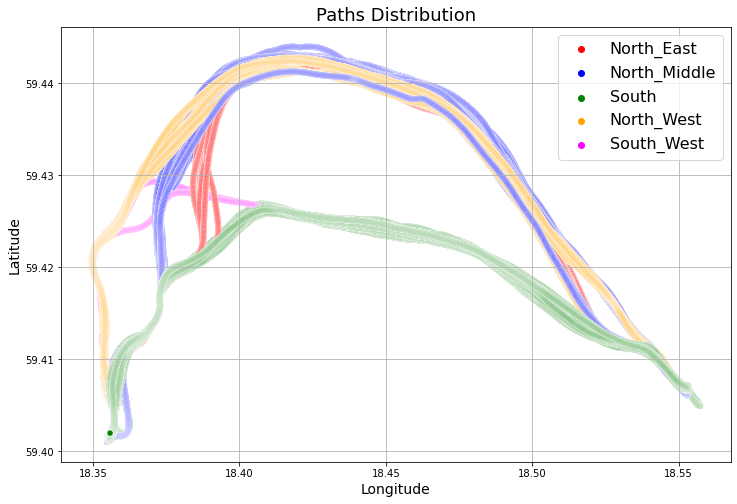

In [17]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for all path classes in a single plot
fig = plt.figure(figsize=(12, 8))

# Use the 'hue' parameter to specify the path selection class
sns.scatterplot(x='longitude', y='latitude', hue='direction', 
                data=df, legend='full', palette=['red', 'blue', 'green', 'orange','magenta'])


# Set title
plt.title('Paths Distribution', fontsize=18)

plt.legend(fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.grid()

plt.savefig(Output_folder+'/ScatterPlot_Colorful_paths.png')  

plt.show()

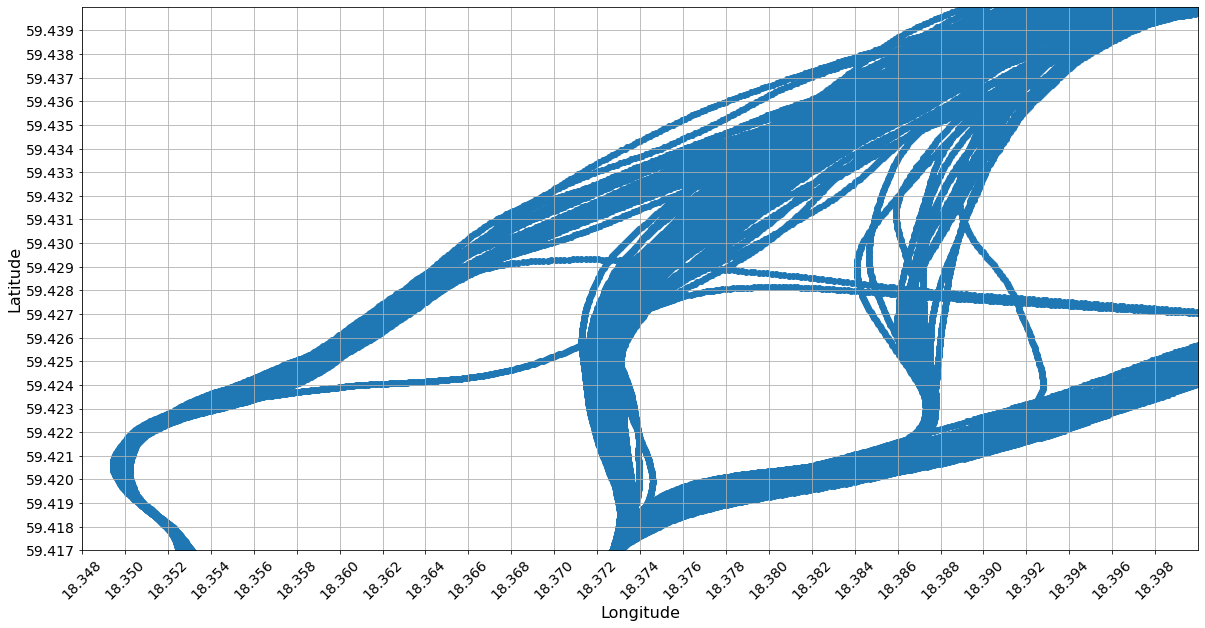

In [18]:
### Zoom in for North_West, Middle, and East segments

fig = plt.figure(figsize=(20,10))
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.grid()

# Set x-axis ticks
plt.xticks(np.arange(18.348, 18.40, 0.002), fontsize=14, rotation=45)
# Set y-axis ticks
plt.yticks(np.arange(59.417, 59.44, 0.001), fontsize=14)

plt.xlim((18.348, 18.40))
plt.ylim((59.417, 59.44))

plt.savefig(Output_folder+'/ScatterPlot_Zoomin_closest_segments_North_West_East.png')  

plt.show()

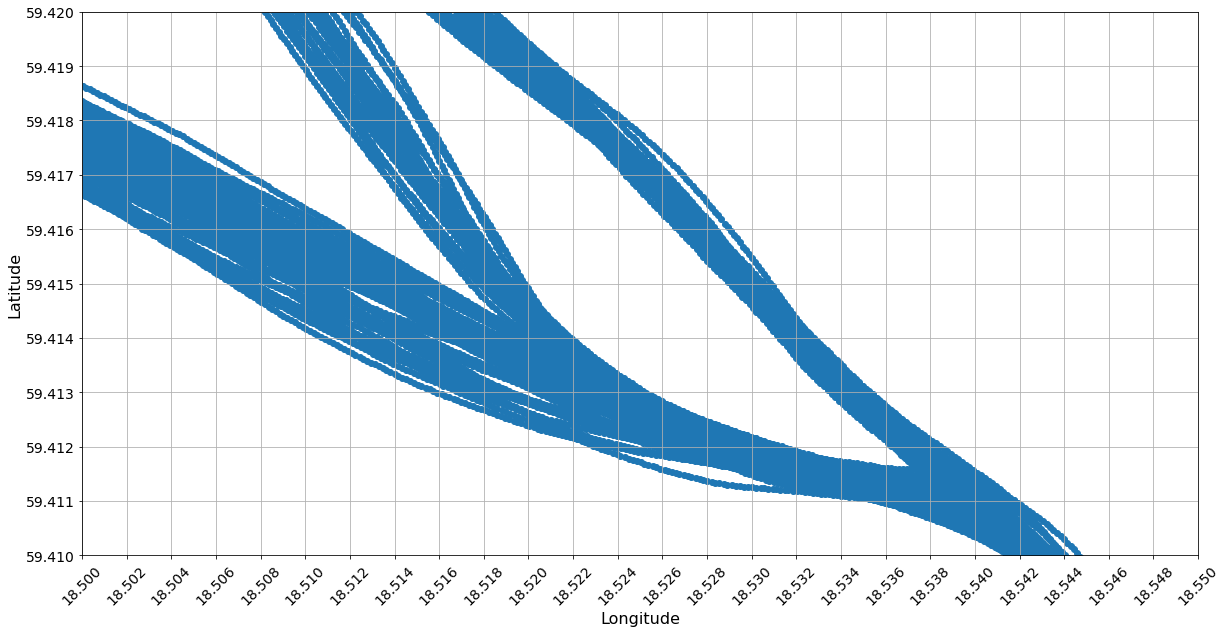

In [19]:
### Zoom in for North_East_Upper and North_East_Lower segments

fig = plt.figure(figsize=(20,10))
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.grid()

# Set x-axis ticks
plt.xticks(np.arange(18.50, 18.55, 0.002), fontsize=14, rotation=45)
# Set y-axis ticks
plt.yticks(np.arange(59.41, 59.42, 0.001), fontsize=14)

plt.xlim((18.50, 18.55))
plt.ylim((59.41, 59.42))

plt.savefig(Output_folder+'/ScatterPlot_Zoomin_closest_segments_North_Upper_Lower.png')  

plt.show()

In [20]:
df.direction.unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

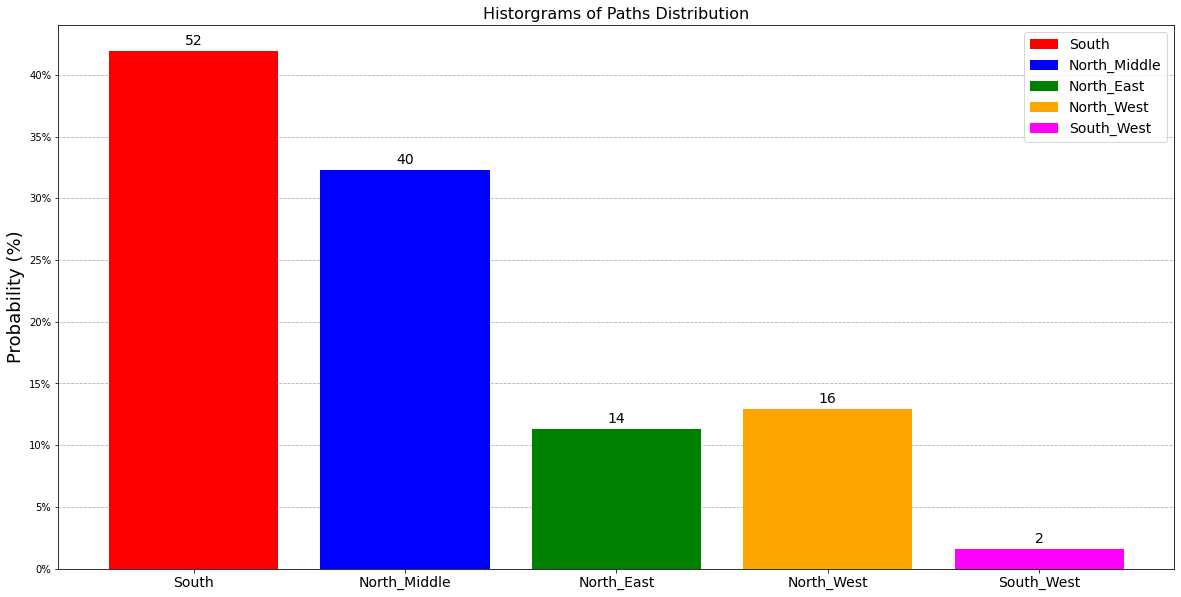

In [21]:
# train_df.groupby(['RT_id']).mean()
rt_class=[]
rt_class=df.groupby('RT_id')['direction'].first()

# Calculate the probability distribution of each path class
prob_dist = rt_class.value_counts(normalize=True)
counts = rt_class.value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)


# Set the colors and labels for each path class
colors=['red', 'blue', 'green', 'orange', 'magenta']

labels = ['South', 'North_Middle', 'North_East', 'North_West', 'South_West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.005, str(counts[labels[i]]), ha='center', fontsize=14)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)


# Set the title and legend
ax.set_title('Historgrams of Paths Distribution', fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('',fontsize=18)
plt.ylabel('Probability (%)',fontsize=18)

ax.legend(fontsize=14)
ax.grid(axis='y', linestyle='--', zorder=0)


plt.savefig(Output_folder+'/Hist_5paths.png', dpi=300)  

plt.show()


In [22]:
# st=stop

### Single Gaussian Distributions for Several Segments

In [23]:
df=dforig2
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

243688


South           104308
North_Middle     78035
North_West       30626
North_East       26311
South_West        4408
Name: direction, dtype: int64

In [24]:
df=dforig2
df['Path_class']=df.direction.copy()

print(df.shape)
df.direction.unique()

(243688, 74)


array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

#### Data Processing for 8 Path Segments

In [25]:
df_dest1=pd.DataFrame([])
df_dest1=df[(df.latitude>59.415) & (df.longitude>18.522)]
df_dest1['segment'] = 'North_Upper'

df_dest2=pd.DataFrame([])
df_dest2=df[(df.latitude<59.419) & (df.latitude>59.417) & (df.longitude>18.508) & (df.longitude<18.518)]
df_dest2['segment'] = 'North_Lower'

df_dest3=pd.DataFrame([])
df_dest3=df[(df.latitude<59.43) & (df.longitude>18.42) & (df.longitude<18.47)]
df_dest3['segment'] = 'South'

df_dest4=pd.DataFrame([])
df_dest4=df[(df.latitude>59.43) & (df.longitude>18.40) & (df.longitude<18.50)]
df_dest4['segment'] = 'North'

df_dest5=pd.DataFrame([])
df_dest5=df[(df.latitude<59.43) & (df.latitude>59.424) & (df.longitude>18.38) & (df.longitude<18.40)]
df_dest5['segment'] = 'North_East'

df_dest6=pd.DataFrame([])
df_dest6=df[(df.latitude<59.43) & (df.latitude>59.4205) & (df.longitude>18.37) & (df.longitude<18.38)]
df_dest6['segment'] = 'North_Middle'

df_dest7=pd.DataFrame([])
df_dest7=df[(df.latitude<59.43) & (df.latitude>59.42) & (df.longitude<18.37)]
df_dest7['segment'] = 'North_West'

df_dest8=pd.DataFrame([])
df_dest8=df
df_dest8['segment'] = 'Other'

# drop rows that exist in other segements
df_dest8 = df_dest8[~((df_dest8.index.isin(df_dest1.index)) | (df_dest8.index.isin(df_dest2.index)) |
                        (df_dest8.index.isin(df_dest3.index)) | (df_dest8.index.isin(df_dest4.index)) |
                        (df_dest8.index.isin(df_dest5.index)) |(df_dest8.index.isin(df_dest6.index)) |
                        (df_dest8.index.isin(df_dest7.index)))]

df1=pd.concat([df_dest1, df_dest2, df_dest3, df_dest4, df_dest5, df_dest6, df_dest7, df_dest8], axis=0)

df1.shape

(243688, 75)

In [26]:
df=df1
df.RT_id.unique()
df.RT_id.unique()
pd.Series(df.RT_id.unique()).sort_values().values   
df.shape

(243688, 75)

In [27]:
df.segment.unique()
print(df['segment'].value_counts().sum())
df['segment'].value_counts()

243688


Other           168939
North            35133
South            23528
North_Middle      5775
North_West        5398
North_Upper       2523
North_East        1814
North_Lower        578
Name: segment, dtype: int64

In [28]:
#### Check the path classes in segments

df[df.segment=='Other']['Path_class'].unique()

array(['North_East', 'North_Middle', 'South', 'North_West', 'South_West'],
      dtype=object)

In [29]:
# st=stop

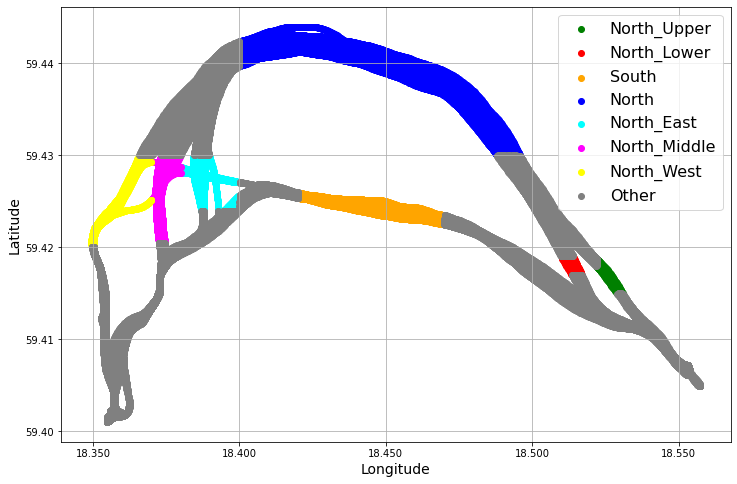

In [30]:
import matplotlib.pyplot as plt

# Specify unique segments
unique_segments = df['segment'].unique()

# Set up colors for each segment
colors = ['green', 'red', 'orange', 'blue', 'cyan', 'magenta', 'yellow', 'grey']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting each segment separately
for idx, segment in enumerate(unique_segments):
    segment_data = df[df['segment'] == segment]
    ax.scatter(segment_data['longitude'], segment_data['latitude'], label=segment, color=colors[idx])

# Set title and labels
# ax.set_title('Distribution of Path Segments', fontsize=18)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Set number format for axis ticks
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3f'))

# Show legend and grid
ax.legend(fontsize=16)
ax.grid()

# Save the plot
plt.savefig(Output_folder+'/Fig_Cind_route_Dist_8Segs.png', dpi=300)
plt.show()


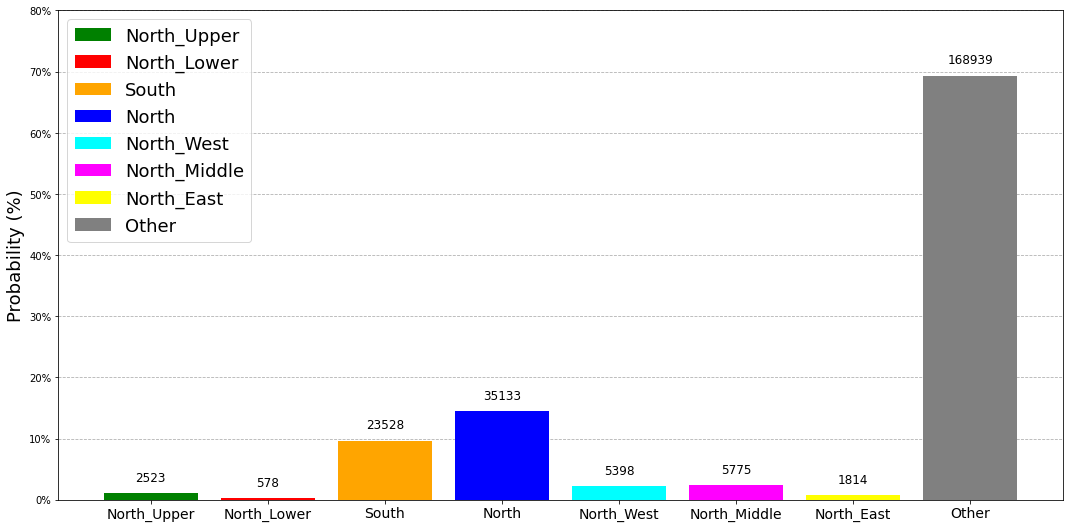

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the probability distribution of each path class
prob_dist = df['segment'].value_counts(normalize=True)
counts = df['segment'].value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(18, 9))
# ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=18)

# Set the colors and labels for each path class
colors = ['green', 'red', 'orange', 'blue', 'cyan', 'magenta', 'yellow', 'grey']
labels = ['North_Upper', 'North_Lower', 'South', 'North', 'North_West', 'North_Middle', 'North_East', 'Other']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.02, str(counts[labels[i]]), ha='center', fontsize=12)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelsize=14)


# Set the y-axis labels as percentages
ax.yaxis.set_ticks(np.arange(0, max(prob_dist.values)*1+.2, 0.1))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

# Set the title and legend
# ax.set_title('Histograms of Path Segments', fontsize=16)
ax.legend(fontsize=18)
ax.grid(axis='y', linestyle='--', zorder=0)

plt.savefig(Output_folder+'/Fig_Cind_Stats_8Segs_Hists.png', dpi=300)  

plt.show()


In [32]:
# dforig[(dforig.RT_id==1308) & (dforig.Direct_RT==0)].longitude
df.segment.unique()

array(['North_Upper', 'North_Lower', 'South', 'North', 'North_East',
       'North_Middle', 'North_West', 'Other'], dtype=object)

In [33]:
df['Path_class'].unique()

array(['North_Middle', 'North_West', 'North_East', 'South', 'South_West'],
      dtype=object)

#### Statistics on Segements

In [34]:
# df[['latitude','longitude', 'segment', 'Path_class']]

In [35]:
# create an empty DataFrame to store the results
result_seg_df = pd.DataFrame(columns=['segment', 'latitude_mean', 'latitude_std', 'longitude_mean', 'longitude_std'])

# group the DataFrame by 'segment' and 'Path_class'
grouped_df = df.groupby(['segment'])

# compute the mean and standard deviation for each group
mean_std_df = grouped_df[['latitude', 'longitude']].agg(['mean', 'std']).round(4)

# flatten the column names
mean_std_df.columns = ['_'.join(col).strip() for col in mean_std_df.columns.values]

# reset the index to make 'segment' and 'Path_class' columns regular columns
mean_std_df = mean_std_df.reset_index()

# append the resulting DataFrame to the existing DataFrame
result_seg_df = pd.concat([result_seg_df, mean_std_df], axis=0, ignore_index=True)

# display the resulting DataFrame
Seg_stats_gauss=result_seg_df
Seg_stats_gauss


,segment,latitude_mean,latitude_std,longitude_mean,longitude_std
0,North,59.4390,0.0035,18.4474,0.0269
1,North_East,59.4260,0.0018,18.3920,0.0059
2,North_Lower,59.4180,0.0006,18.5135,0.0014
3,North_Middle,59.4249,0.0027,18.3730,0.0013
4,North_Upper,59.4167,0.0010,18.5260,0.0023
5,North_West,59.4245,0.0025,18.3571,0.0053
6,Other,59.4154,0.0089,18.4270,0.0740
7,South,59.4243,0.0008,18.4450,0.0145


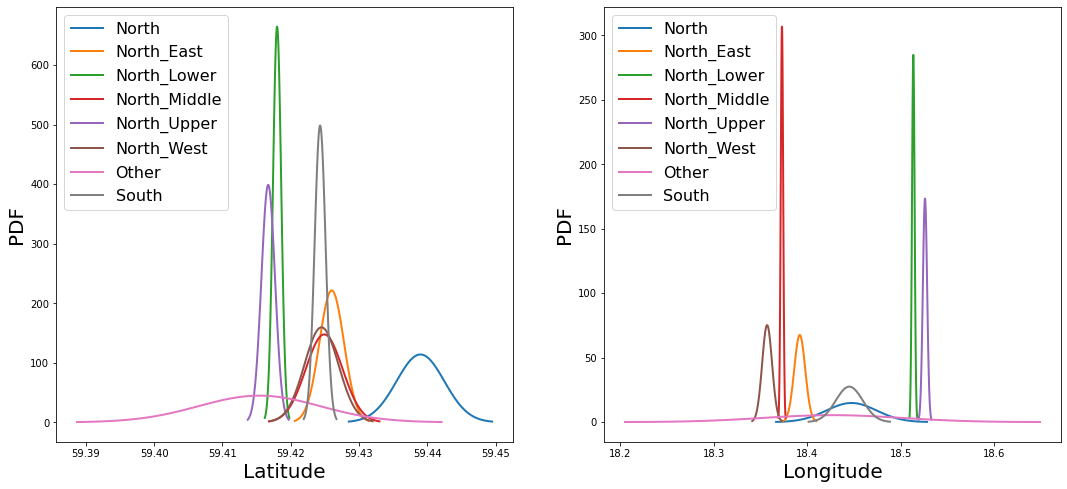

In [36]:
from scipy.stats import norm

# Define the figure and subplot layout
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the PDFs for latitude and longitude for each segment
for i, row in Seg_stats_gauss.iterrows():
    # Define the x-axis range for the PDF plot
    x_min = row['latitude_mean'] - 3 * row['latitude_std']
    x_max = row['latitude_mean'] + 3 * row['latitude_std']
    x = np.linspace(x_min, x_max, 100)
    
    # Calculate the PDF for latitude
    pdf_lat = norm.pdf(x, loc=row['latitude_mean'], scale=row['latitude_std'])
    
    # Plot the PDF for latitude
    axs[0].plot(x, pdf_lat, label=row['segment'], linewidth=2)
    axs[0].set_xlabel('Latitude', fontsize='20')
    axs[0].set_ylabel('PDF', fontsize='20')
    axs[0].grid()
    
    # Define the x-axis range for the PDF plot
    y_min = row['longitude_mean'] - 3 * row['longitude_std']
    y_max = row['longitude_mean'] + 3 * row['longitude_std']
    y = np.linspace(y_min, y_max, 100)
    
    # Calculate the PDF for longitude
    pdf_lon = norm.pdf(y, loc=row['longitude_mean'], scale=row['longitude_std'])
    
    # Plot the PDF for longitude
    axs[1].plot(y, pdf_lon, label=row['segment'], linewidth=2)
    axs[1].set_xlabel('Longitude', fontsize='20')
    axs[1].set_ylabel('PDF', fontsize='20')
    axs[1].grid()

# Add a legend to the plots
axs[0].legend(fontsize='16', loc='upper left')
axs[1].legend(fontsize='16', loc='upper left')


# Show the plots
plt.savefig(Output_folder+'/Fig_Cind_8paths_Gaussians_Lat_Lon.png', dpi=300)  

plt.show()


In [37]:
# st=stop

### Single Gaussian model (GMM) for each Segement

In [38]:
print(df['segment'].unique())
df_paths=df.copy()
# df_paths = df_paths.reset_index(drop=True)
df_paths.shape

['North_Upper' 'North_Lower' 'South' 'North' 'North_East' 'North_Middle'
 'North_West' 'Other']


(243688, 75)

In [39]:
from sklearn.mixture import GaussianMixture

# Define the number of Gaussian components for the GMM model
n_segs = 1


# Get the unique segment
segments = df_paths.segment.unique()


# Create dictionaries to store th GMM models and their outcomes for each segment
gmm_fitted_models = {}
gmm_models_means = {}
gmm_dfs = {}

# Train the GMM models for each segment 
for i, seg in enumerate(segments):
# for i, seg in enumerate(['Canal']):
    # Get the paths for the current direction
    df_seg= df_paths[df_paths.segment == seg][['latitude', 'longitude']]
    
    
    # Create and fit the segment's GMM model with its corresponding data, and sore it in a dictionary
    gmm_fitted_models[seg] = GaussianMixture(n_components=1, random_state=0).fit(df_seg[['longitude','latitude']].to_numpy())

    
    # Store some GMM models' outcomes in dictionaries
    gmm = gmm_fitted_models[seg]
    gmm_models_means[seg]=gmm.means_
    gmm_dfs[seg]=df_seg

In [40]:
 gmm_models_means

{'North_Upper': array([[18.52599083, 59.41669827]]),
 'North_Lower': array([[18.51345096, 59.41800036]]),
 'South': array([[18.44497091, 59.42433307]]),
 'North': array([[18.4474217 , 59.43898694]]),
 'North_East': array([[18.39200391, 59.42603943]]),
 'North_Middle': array([[18.37304949, 59.42492193]]),
 'North_West': array([[18.35709122, 59.42446179]]),
 'Other': array([[18.42695541, 59.41541485]])}

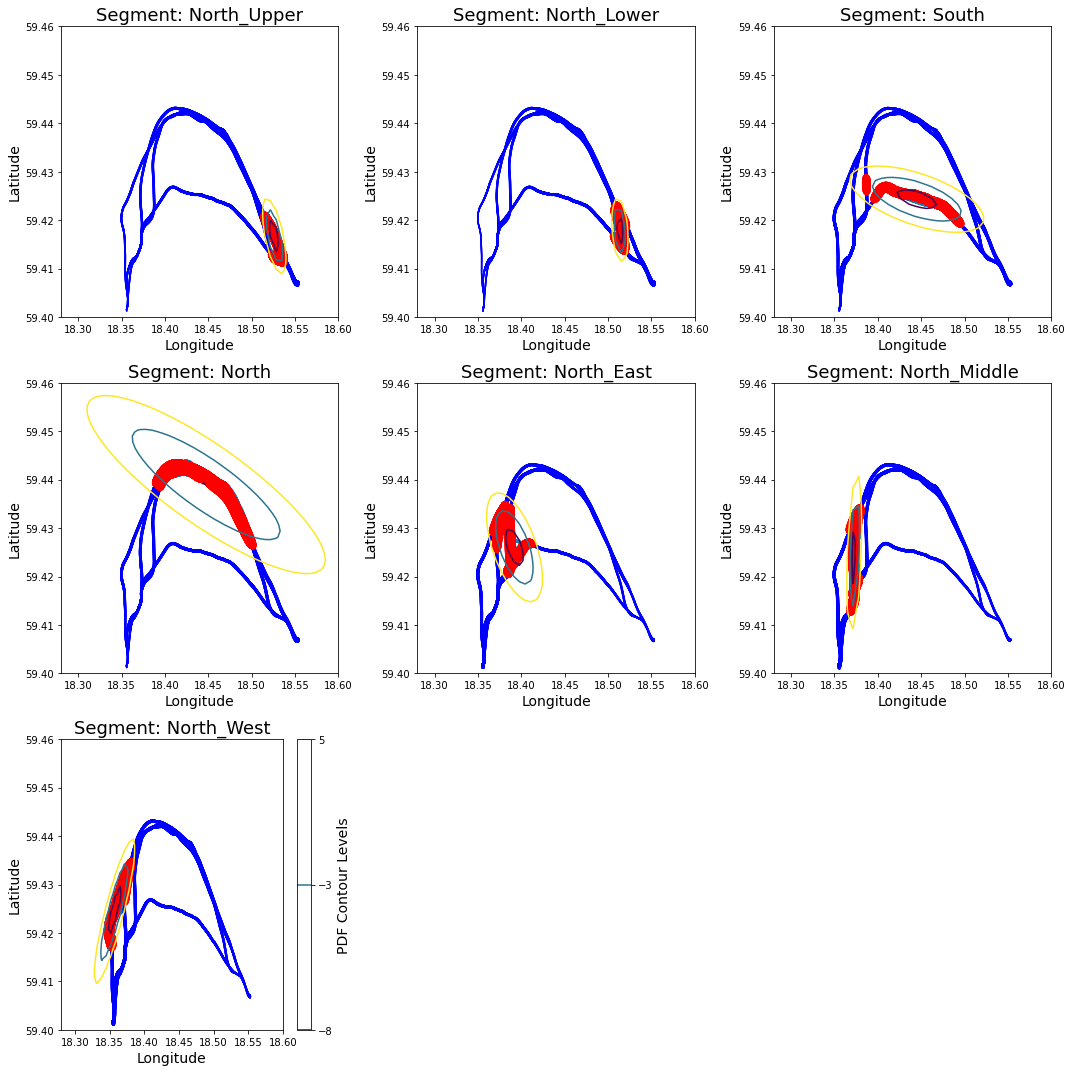

In [41]:
from matplotlib.colors import LogNorm, Normalize

segments = df['segment'].unique()
segments = segments[segments != 'Other']  # Removing 'Other' segment

num_segments = len(segments)
num_cols = 3  # Number of columns
num_rows = (num_segments // num_cols) + 1 if num_segments % num_cols != 0 else num_segments // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, segment in enumerate(segments):
    r, c = i // num_cols, i % num_cols
    df_seg = gmm_dfs[segment]
    gmm = gmm_fitted_models[segment]

    x = np.linspace(18.28, 18.60)
    y = np.linspace(59.40, 59.46)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)

    ax = axs[r][c]

    CS = ax.contour(X, Y, Z, levels=[-8, -3, 5])
    ax.scatter(df_seg['longitude'], df_seg['latitude'], 0.8)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

    trips = df[df['RT_id'].isin([0, 5, 10, 23])]
    scores = gmm.score_samples(trips[['longitude', 'latitude']].to_numpy())

    ax.scatter(trips.longitude, trips.latitude, s=Normalize()(scores)*5, c="blue")
    ax.scatter(trips.longitude, trips.latitude, s=LogNorm()(scores)*100, c="red")

    ax.set_title("Segment: {}".format(segment), fontsize=18)
    ax.axis("tight")

    if i == num_segments - 1:  # For the last subplot
        CB = plt.colorbar(CS, ax=ax)
        CB.set_label('PDF Contour Levels', fontsize=14)

# Remove empty subplots
for i in range(num_segments, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()

plt.savefig(Output_folder + '/Fig_Cind_7Segs_Gaussians_1contour.png', dpi=300)
plt.show()


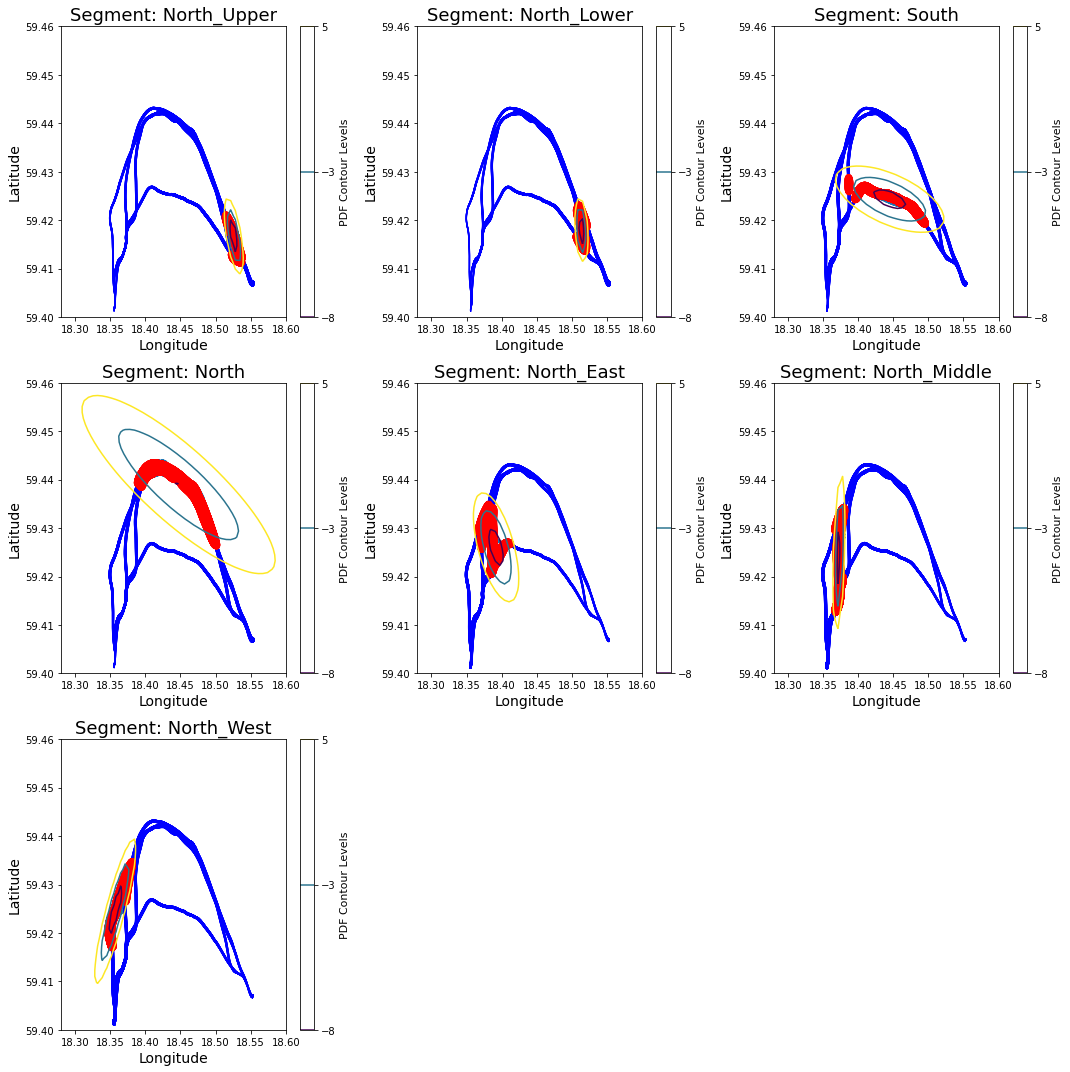

In [42]:
from matplotlib.colors import LogNorm, Normalize

segments = df['segment'].unique()
segments = segments[segments != 'Other']  # Removing 'Other' segment

num_segments = len(segments)
num_cols = 3  # Number of columns
num_rows = (num_segments // num_cols) + 1 if num_segments % num_cols != 0 else num_segments // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, segment in enumerate(segments):
    r, c = i // num_cols, i % num_cols
    df_seg = gmm_dfs[segment]
    gmm = gmm_fitted_models[segment]

    x = np.linspace(18.28, 18.60)
    y = np.linspace(59.40, 59.46)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -gmm.score_samples(XX)
    Z = Z.reshape(X.shape)

    ax = axs[r][c]

    CS = ax.contour(X, Y, Z, levels=[-8, -3, 5])
    ax.scatter(df_seg['longitude'], df_seg['latitude'], 0.8)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

    trips = df[df['RT_id'].isin([0, 5, 10, 23])]
    scores = gmm.score_samples(trips[['longitude', 'latitude']].to_numpy())

    ax.scatter(trips.longitude, trips.latitude, s=Normalize()(scores)*5, c="blue")
    ax.scatter(trips.longitude, trips.latitude, s=LogNorm()(scores)*100, c="red")

    ax.set_title("Segment: {}".format(segment), fontsize=18)
    ax.axis("tight")

    CB = plt.colorbar(CS, ax=ax,)  # Add color bar for each subplot
    CB.set_label('PDF Contour Levels', fontsize=11)


# Remove empty subplots
for i in range(num_segments, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.savefig(Output_folder + '/Fig_Cind_7Segs_Gaussians.png', dpi=300)
plt.show()


In [43]:
# Score the points for each voyage
path_mapping = {'South_East': 0,'South_West': 1,'South': 2, 'North':3,  'North_West':4, 
               'North_Middle':5, 'North_East':6, 'Other':7}

# Create a dictionary to store the scores for every point in each segment
scores={}
trip_segs_tag={}
trip_path = {}

segments=df['segment'].unique()

# ['South_East','South_West','South', 'North',  'North_West', 'North_Middle', 'North_East', 'Other']

for rt in df.RT_id.unique().tolist():
# for rt in [0, 5, 27]:

# Iterate over each segment
    for i, seg in enumerate(segments):
    # Get the data for the current segment
        df_trip=df[df.RT_id==rt]
        df_trip_seg=df_trip[df_trip.segment==seg]
        if df_trip_seg.empty:
            scores[rt, seg]=np.NaN; trip_segs_tag[rt, seg] = 'Bypass'
            continue
        gmm= gmm_fitted_models[seg]

        # Score every point -- the higher the value, the more likely this point is to belong to this Gaussian
        scores[rt, seg] = gmm.score_samples(df_trip_seg[['longitude','latitude']].to_numpy())
        if np.nanmean(scores[rt, seg])< 5:
            trip_segs_tag[rt, seg] = 'Bypass'
        elif np.nanmean(scores[rt, seg]) > 5:
            trip_segs_tag[rt, seg] = 'Pass'


    # check if 'Not_Pass' exists in trip_segs_tag for keys 'South-East' and 'Shortcut'
    if ((trip_segs_tag[rt, 'North'] == 'Pass') & (trip_segs_tag[rt, 'North_West'] == 'Pass')):
        trip_path[rt] = 'North_West'
        
    elif ((trip_segs_tag[rt, 'North'] == 'Pass') & (trip_segs_tag[rt, 'North_Middle'] == 'Pass') 
          & (trip_segs_tag[rt, 'North_East'] == 'Bypass')):
        trip_path[rt] = 'North_Middle'
        
    elif ((trip_segs_tag[rt, 'North'] == 'Pass') & (trip_segs_tag[rt, 'North_East'] == 'Pass') 
          & (trip_segs_tag[rt, 'North_Middle'] == 'Bypass')):
          trip_path[rt] = 'North_East'
          
    elif ((trip_segs_tag[rt, 'South'] == 'Pass') & (trip_segs_tag[rt, 'North_West'] == 'Pass')):
        trip_path[rt] = 'South_West'
        
    elif ((trip_segs_tag[rt, 'South'] == 'Pass') & (trip_segs_tag[rt, 'North_West'] == 'Bypass')):
        trip_path[rt] = 'South'



# trip_path

In [44]:
df_trip_tag = pd.DataFrame.from_dict(trip_path, orient='index', columns=['Path_class_tag'])
df_trip_tag.index.name = 'RT_id'
df_trip_tag = df_trip_tag.sort_values(by=['RT_id'])

# Path_actual=df.groupby('RT_id')['Path_class'].first()
Path_actual = df.groupby('RT_id')['Path_class'].apply(lambda x: x.mode()[0]).to_frame()

df_result=pd.concat([Path_actual, df_trip_tag], axis=1)
df_result.head(5)

,Path_class,Path_class_tag
RT_id,,
0.0,North_East,North_East
1.0,North_Middle,North_Middle
2.0,North_East,North_East
3.0,North_Middle,North_Middle
4.0,North_East,North_East


In [45]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(df_result.Path_class, df_result.Path_class_tag)
# print(f'Confusion matrix:\n{conf_mat}')

df_conf_mat = pd.DataFrame(conf_mat, index=['North_East', 'North_Middle',
                                            'North_West', 'South', 'South_West'], ##Actual paths
                           columns=['North_East', 'North_Middle',
                                            'North_West', 'South', 'South_West']) ##Predicted paths
df_conf_mat

,North_East,North_Middle,North_West,South,South_West
North_East,14,0,0,0,0
North_Middle,0,40,0,0,0
North_West,0,0,16,0,0
South,0,0,0,52,0
South_West,0,0,0,0,2


In [46]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

report = classification_report(df_result.Path_class, df_result.Path_class_tag, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
North_East,1.0,1.0,1.0,14.0
North_Middle,1.0,1.0,1.0,40.0
North_West,1.0,1.0,1.0,16.0
South,1.0,1.0,1.0,52.0
South_West,1.0,1.0,1.0,2.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,124.0
weighted avg,1.0,1.0,1.0,124.0


### Scatter plots for the results

In [47]:
df_Results = df.copy()  # make a copy of df
df_Results['Path_class_tag'] = df_Results['RT_id'].map(df_result['Path_class_tag'])
df_Results[['RT_id','latitude', 'longitude', 'Path_class', 'Path_class_tag']]

,RT_id,latitude,longitude,Path_class,Path_class_tag
date,,,,,
2022-07-01 12:48:18,1.0,59.415007,18.529724,North_Middle,North_Middle
2022-07-01 12:48:19,1.0,59.415084,18.529570,North_Middle,North_Middle
2022-07-01 12:48:20,1.0,59.415150,18.529435,North_Middle,North_Middle
2022-07-01 12:48:21,1.0,59.415228,18.529274,North_Middle,North_Middle
2022-07-01 12:48:22,1.0,59.415306,18.529111,North_Middle,North_Middle
...,...,...,...,...,...
2022-11-06 15:22:27,123.0,59.401974,18.355802,South,South
2022-11-06 15:22:28,123.0,59.401974,18.355803,South,South
2022-11-06 15:22:29,123.0,59.401973,18.355803,South,South


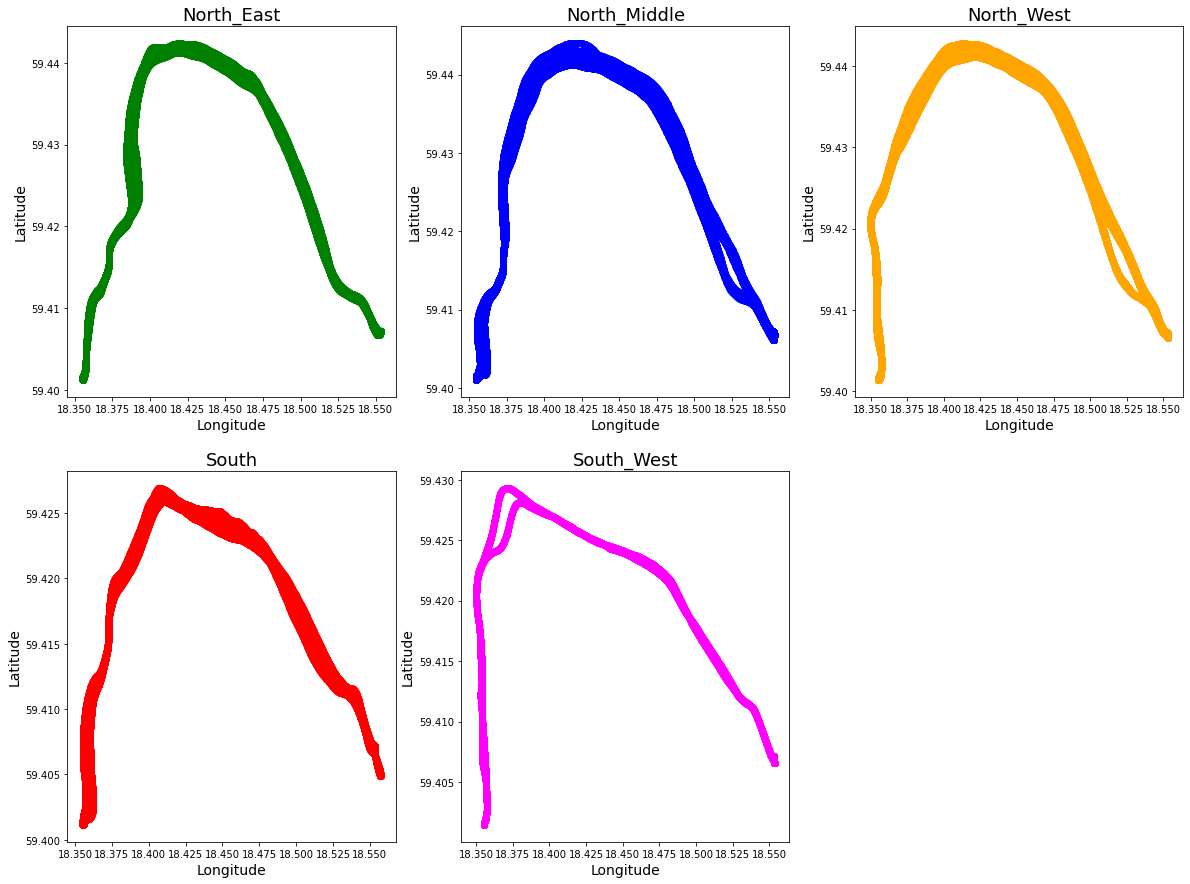

In [48]:
# Visualize the actual paths

from IPython.display import display

display(fig_scatter_actual_paths)


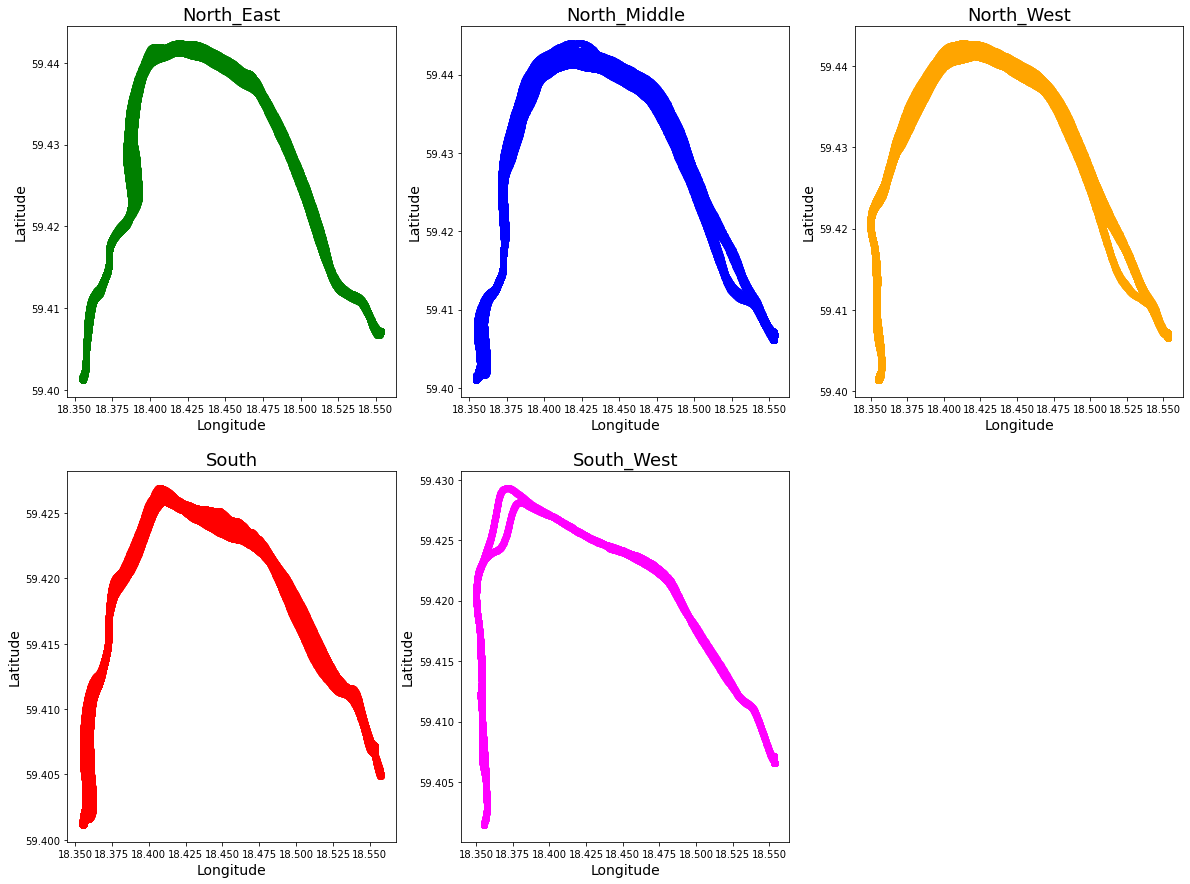

In [49]:
# Visualize the predcited paths using Matplotlib

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Filter data for each direction
south_data = df_Results[df_Results['direction'] == 'South']
north_middle_data = df_Results[df_Results['direction'] == 'North_Middle']
north_east_data = df_Results[df_Results['direction'] == 'North_East']
north_west_data = df_Results[df_Results['direction'] == 'North_West']
south_west_data = df_Results[df_Results['direction'] == 'South_West']

# Scatter plots for each direction
axes[0, 0].scatter(north_east_data['longitude'], north_east_data['latitude'], color='green')
axes[0, 1].scatter(north_middle_data['longitude'], north_middle_data['latitude'], color='blue')
axes[0, 2].scatter(north_west_data['longitude'], north_west_data['latitude'], color='orange')
axes[1, 0].scatter(south_data['longitude'], south_data['latitude'], color='red')
axes[1, 1].scatter(south_west_data['longitude'], south_west_data['latitude'], color='magenta')

# Set titles for each subplot
axes[0, 0].set_title('North_East',fontsize=18)
axes[0, 1].set_title('North_Middle',fontsize=18)
axes[0, 2].set_title('North_West',fontsize=18)
axes[1, 0].set_title('South',fontsize=18)
axes[1, 1].set_title('South_West',fontsize=18)

# Add axis labels
for ax in axes.flatten():
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
# # Hide the legend
# for ax in axes.flatten():
#     ax.legend().remove()

# Hide the empty subplot
axes[1, 2].axis('off')

plt.savefig(Output_folder + '/Fig_Cind_Gauss_Indv_5paths.png', dpi=300)
plt.show()
